<a href="https://colab.research.google.com/github/jirayuwat12/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch import nn # cover building block for neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data preparing and loading

In [ ]:
# create a dataset from know formular
weight = 0.7
bias = 0.3

#create data
start = 0
end = 5
step = 0.1

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

Text(0, 0.5, 'y')

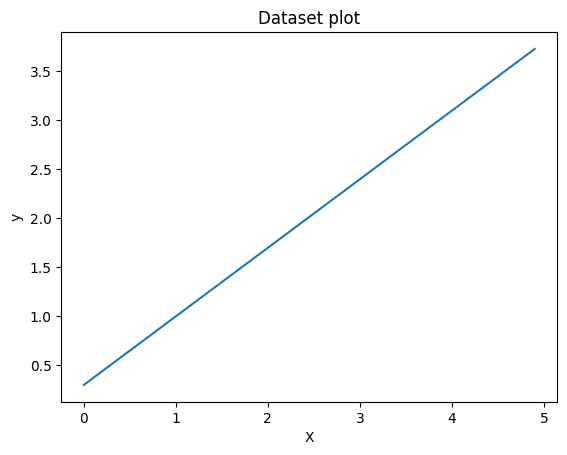

In [ ]:
plt.plot(X,y)
plt.title('Dataset plot')
plt.xlabel('X')
plt.ylabel('y')

## split data into traing and test sets

In [ ]:
# create train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 42)

In [ ]:
# optional 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, random_state = 42, shuffle = True)

In [ ]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    val_data = X_val,
                    val_labels = y_val,
                    test_data = X_test,
                    test_labels = y_test,
                    prediction = None):
  plt.figure(figsize = (10,7))

  plt.scatter(train_data, train_labels, color = 'b', s = 4, label = 'Train data')
  plt.scatter(val_data, val_labels, color = 'g', s = 4, label = 'Validate data')
  plt.scatter(test_data, test_labels, color = 'black', s = 4, label = 'Test data')

  if prediction is not None :
    plt.scatter(test_data, prediction, color = 'r', s = 6, label = 'Prediction')
  
  plt.legend(prop = {'size' : 14})
  

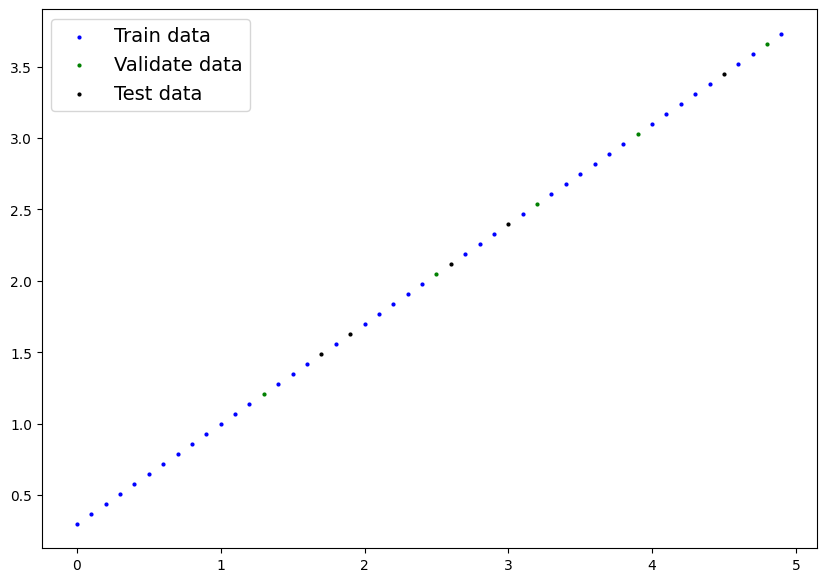

In [ ]:
plot_prediction()

#2. Building model

## PyTorch modle building essentials

1. `torch.nn` - contain all of the building block for nn
1. `torch.nn.Parameter` - what parameter should model **try and learn**, 
1. `torch.nn.Module` - the base class for nn modules **need to overwrite `def forward` btw**
1. `torch.optim` - the optimizer in pytorch 

In [139]:
# Create linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))
    
  # forward methid to defined the computation
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [140]:
model_101 = LinearRegressionModel()

model_101

LinearRegressionModel()

In [141]:
# lsit named parameter
model_101.state_dict()

OrderedDict([('weights', tensor([0.0296])), ('bias', tensor([0.3965]))])

## try to predict from **un-learned** model



In [142]:
with torch.inference_mode(): # not keep grad track -> predict faster 
  y_preds = model_101(X_test)

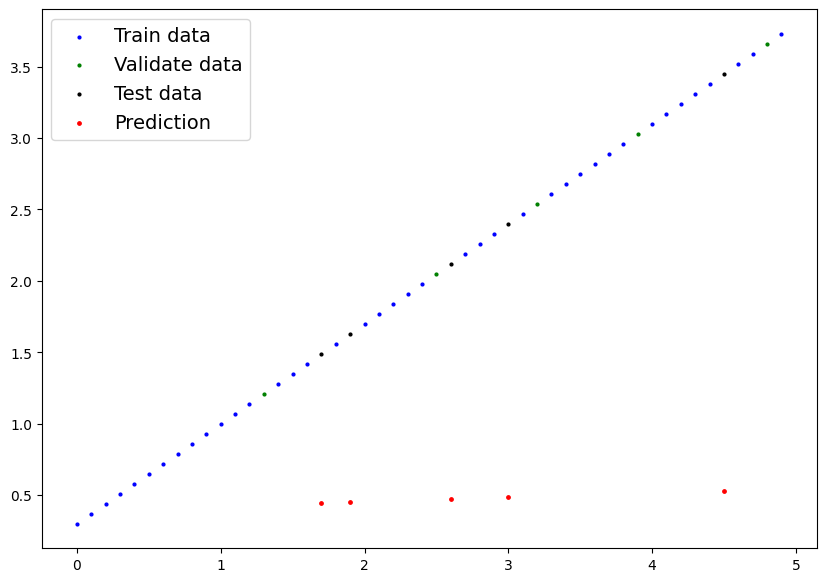

In [143]:
plot_prediction(prediction = y_preds)

## train model

In [144]:
# set up loss function
loss_fn = nn.L1Loss()

# set up an optimizer
optimizer = torch.optim.SGD(params = model_101.parameters(),
                            lr = 0.005)


In [145]:
# make a training/ testing loop
epochs = 200

history = dict()
history['val_loss'] = []
history['train_loss'] = []
for epoch in range(epochs): # -> loop throuh the data
  # set model to training mode -> set all parameter the required gradient
  model_101.train()

  # 1. forward pass
  y_pred = model_101(X_train)

  # 2. apply loss function
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss 
  loss.backward()

  # 5. step the optimizer ( perform gradient descent )
  optimizer.step() 

  # Testing
  model_101.eval()

  with torch.inference_mode():
    val_pred = model_101(X_val)
    val_loss = loss_fn(val_pred, y_val)

  history['val_loss'].append(val_loss)
  history['train_loss'].append(float(loss))

  if not epoch % 10:
    print(f'Epoch : {epoch}\t| Loss : {loss:.3f} | Val_loss : {val_loss:.3f}')


Epoch : 0	| Loss : 1.470 | Val_loss : 1.968
Epoch : 10	| Loss : 1.163 | Val_loss : 1.560
Epoch : 20	| Loss : 0.864 | Val_loss : 1.159
Epoch : 30	| Loss : 0.584 | Val_loss : 0.769
Epoch : 40	| Loss : 0.340 | Val_loss : 0.410
Epoch : 50	| Loss : 0.167 | Val_loss : 0.157
Epoch : 60	| Loss : 0.115 | Val_loss : 0.076
Epoch : 70	| Loss : 0.104 | Val_loss : 0.069
Epoch : 80	| Loss : 0.095 | Val_loss : 0.063
Epoch : 90	| Loss : 0.086 | Val_loss : 0.057
Epoch : 100	| Loss : 0.077 | Val_loss : 0.051
Epoch : 110	| Loss : 0.068 | Val_loss : 0.044
Epoch : 120	| Loss : 0.058 | Val_loss : 0.038
Epoch : 130	| Loss : 0.049 | Val_loss : 0.032
Epoch : 140	| Loss : 0.040 | Val_loss : 0.026
Epoch : 150	| Loss : 0.031 | Val_loss : 0.020
Epoch : 160	| Loss : 0.022 | Val_loss : 0.013
Epoch : 170	| Loss : 0.018 | Val_loss : 0.010
Epoch : 180	| Loss : 0.026 | Val_loss : 0.004
Epoch : 190	| Loss : 0.021 | Val_loss : 0.011


In [146]:
model_101.state_dict()

OrderedDict([('weights', tensor([0.6899])), ('bias', tensor([0.3002]))])

Text(0, 0.5, 'L1 loss')

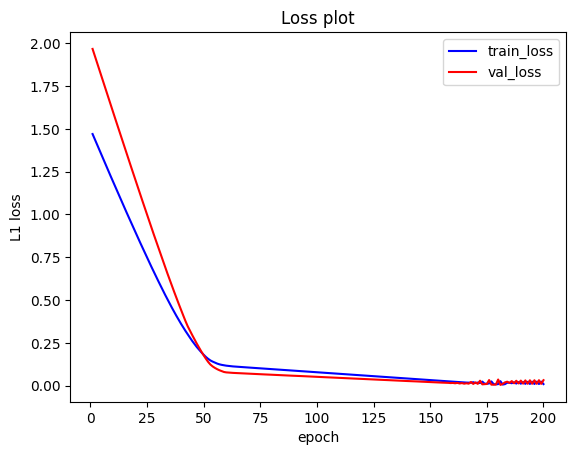

In [150]:
plt.plot(np.linspace(1,epochs,epochs), history['train_loss'], c = 'b', label = 'train_loss')
plt.plot(np.linspace(1,epochs,epochs), history['val_loss'], c = 'r', label = 'val_loss')
plt.title('Loss plot')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('L1 loss')

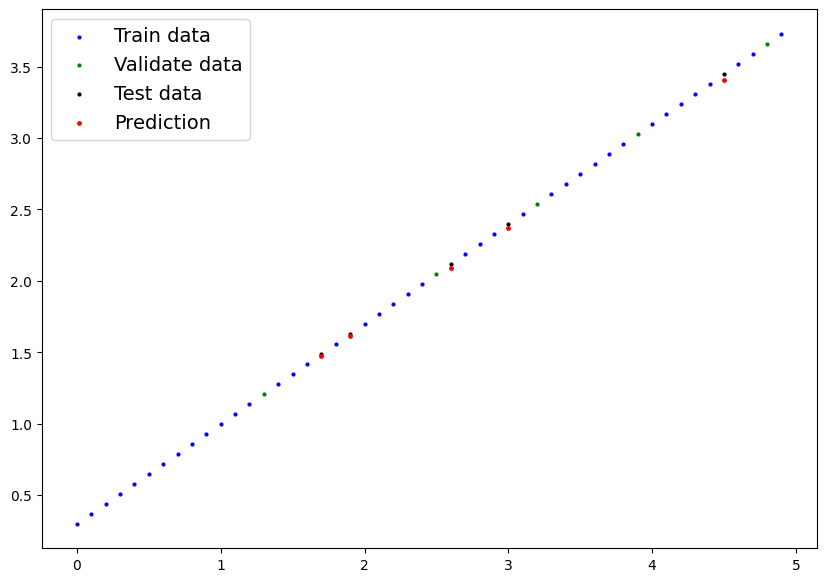

In [148]:
with torch.inference_mode():
  y_pred = model_101(X_test)

plot_prediction(prediction = y_pred)

# Save/Load models

In [154]:
# save model in pickle format
torch.save(model_101.state_dict(),'model_101_state_dict.pth')

In [155]:
# load model
loaded_model_101 = LinearRegressionModel()
loaded_model_101.load_state_dict(
  torch.load('model_101_state_dict.pth')
)

loaded_model_101.state_dict()

OrderedDict([('weights', tensor([0.6899])), ('bias', tensor([0.3002]))])